# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-11-25 09:00:04.956381


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 11/24/20


,11/24/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,12591163,259925,2.06
Brazil,6118708,170115,2.78
India,9222216,134699,1.46
Mexico,1060152,102739,9.69
United Kingdom,1542611,55935,3.63
Italy,1455022,51306,3.53
France,2206126,50324,2.28


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 11/24/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
53897,US,12246766,2020-11-22,256866.0,920.0,142734.0,170494.571429
53896,US,12104032,2020-11-21,255946.0,1429.0,178073.0,169501.857143
53895,US,11925959,2020-11-20,254517.0,1917.0,196010.0,167878.428571
53894,US,11729949,2020-11-19,252600.0,1987.0,187963.0,165243.857143
53893,US,11541986,2020-11-18,250613.0,1897.0,170401.0,161427.428571
53892,US,11371585,2020-11-17,248716.0,1692.0,160515.0,157591.285714
53891,US,11211070,2020-11-16,247024.0,734.0,157766.0,154331.142857


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 11/24/20


,11/24/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,607001,34362.0,5.66
Texas,1181533,21245.0,1.80
California,1145209,18862.0,1.65
Florida,953300,18157.0,1.90
New Jersey,313863,16819.0,5.36
Illinois,674089,12261.0,1.82
Massachusetts,211199,10551.0,5.00


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 11/24/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1845,California,1114524,2020-11-22,18726.0,54.0,9089.0,11775.571429
1844,California,1105435,2020-11-21,18672.0,32.0,15685.0,11766.857143
1843,California,1089750,2020-11-20,18640.0,98.0,12576.0,10883.428571
1842,California,1077174,2020-11-19,18542.0,89.0,13134.0,10436.857143
1841,California,1064040,2020-11-18,18453.0,106.0,11755.0,9780.714286
1840,California,1052285,2020-11-17,18347.0,59.0,10595.0,8979.000000
1839,California,1041690,2020-11-16,18288.0,26.0,9595.0,8627.571429


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 11/24/20


,11/24/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,374134,7497.0,2.00
Orange,71953,1556.0,2.16
Riverside,82175,1417.0,1.72
San Bernardino,87542,1129.0,1.29
San Diego,74361,984.0,1.32
Sacramento,34186,550.0,1.61
San Joaquin,24804,504.0,2.03


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 11/24/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
5849,Los Angeles,364520,2020-11-22,7438.0,41.0,2651.0,3565.714286
5848,Los Angeles,361869,2020-11-21,7397.0,1.0,4418.0,3617.142857
5847,Los Angeles,357451,2020-11-20,7396.0,33.0,4219.0,3512.285714
5846,Los Angeles,353232,2020-11-19,7363.0,28.0,4896.0,3254.571429
5845,Los Angeles,348336,2020-11-18,7335.0,36.0,3813.0,2910.285714
5844,Los Angeles,344523,2020-11-17,7299.0,24.0,2180.0,2663.857143
5843,Los Angeles,342343,2020-11-16,7275.0,6.0,2783.0,2674.000000
5842,Los Angeles,339560,2020-11-15,7269.0,3.0,3011.0,2797.571429
5841,Los Angeles,336549,2020-11-14,7266.0,20.0,3684.0,2367.428571
5840,Los Angeles,332865,2020-11-13,7246.0,25.0,2415.0,2172.714286



7 day new US cases as of 11/24/20


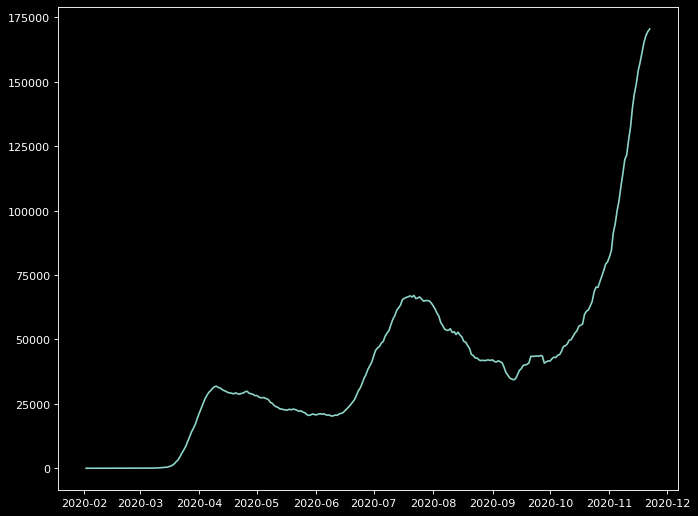

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 11/24/20


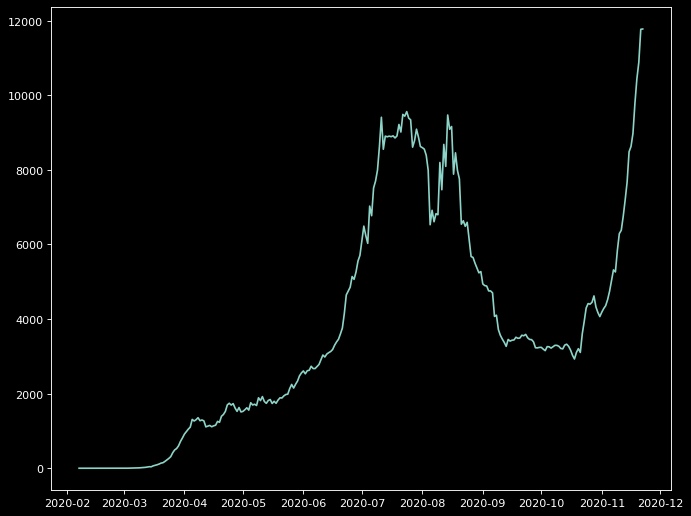

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 11/24/20


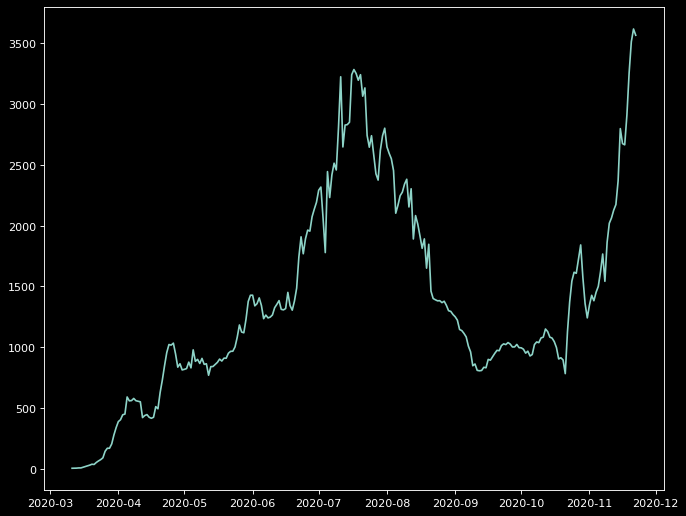

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()